Steps in modelling for binary and multiclass classification:
* Creating a model
* Compiling a model
  * Defining a loss function
  * Setting up an optimizer
      * Finding the best learning rate
  * Creating evaluation metrics
* Fitting a model(getting it to find patterns in our data)
* Improving a model
  
- The power of non-linearity
- Evaluating classification models
  * Visualizing the model
  * Looking at training curves
  * Compare predictions to ground truth(using our evaluation metrics)

### Typical architecture of a classification neura network

Some fundamentals all deep neural networks contain:
* An input layer
* Some hidden layer
* An output layer


* Input layer shape-Same as number of features
* Hidden layer(s) - Problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer - Problem specific, generally 10 to 100
* Output layer shape - 1(one class or the other)
* Hidden activation - Usually ReLU(rectified linear unit)
* Output activation - Sigmoid
* Loss function - Cross Entropy(`tf.keras.losses.BinaryCrossentropy`)
* Optimizer-SGD, Adam

In [1]:
import tensorflow as tf

In [4]:
from sklearn.datasets import make_circles
n_samples=1000

In [5]:
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [6]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

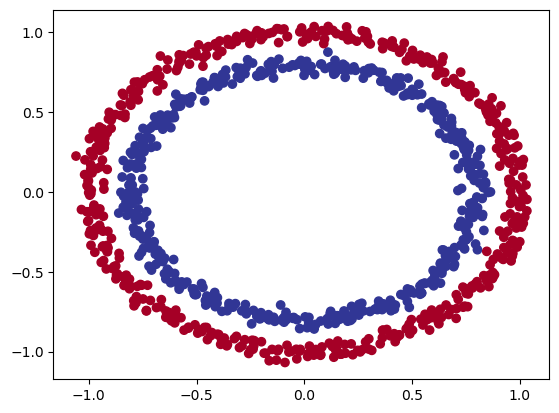

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### Input and Output Shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X),len(y)

(1000, 1000)

In [11]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

Our neural network input shape will have to accept a tensor with at least one dimension being two and output a tensor with at least one value.

### Steps in modelling

1. Creating a model-piece together the layers of a neural network(using the functional or sequential API) or import a previously build model(known as transfer learning).
2. Compiling a model-defining how a model's performance should be measured(loss/metrics)as well as defining how it should improve(optimizer).
3. Fitting a model-letting the model try to find patterns in the data.

In [13]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.7010 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 871us/step - loss: 3.8273 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 857us/step - loss: 1.3254 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 859us/step - loss: 0.7261 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 921us/step - loss: 0.7035 - accuracy: 0.4990


In [14]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 874us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

We have trained enough, let's try adding more layers.

In [16]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_2.fit(X,y,epochs=100,verbose=0)

In [17]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 794us/step - loss: 0.6934 - accuracy: 0.5000


[0.6933673024177551, 0.5]

### Improving a model

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # can also do activation='relu'neurons
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=40, verbose=1) # fit for 100 passes of the data

Epoch 1/40
32/32 [==============================] - 0s 1ms/step - loss: 1.1827 - accuracy: 0.4640
Epoch 2/40
32/32 [==============================] - 0s 1ms/step - loss: 0.8786 - accuracy: 0.3900
Epoch 3/40
32/32 [==============================] - 0s 973us/step - loss: 0.8377 - accuracy: 0.3840
Epoch 4/40
32/32 [==============================] - 0s 912us/step - loss: 0.8162 - accuracy: 0.3920
Epoch 5/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7989 - accuracy: 0.3980
Epoch 6/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7852 - accuracy: 0.3850
Epoch 7/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7740 - accuracy: 0.3810
Epoch 8/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7661 - accuracy: 0.3670
Epoch 9/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7595 - accuracy: 0.3720
Epoch 10/40
32/32 [==============================] - 0s 1ms/step - loss: 0.7535 - accuracy: 0.3920
Epoch 11/40
32/

In [39]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 678us/step
doing binary classifcation...


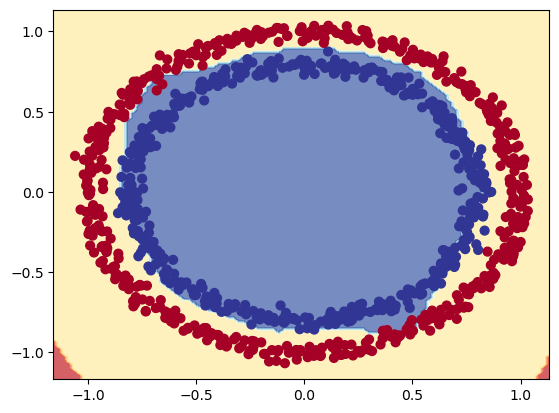

In [48]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)